In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#Importing the Dataset

df = pd.read_csv(r'D:\Microsoft VS Code\Data Analysis Using Python\Dataset Folder\Zomato data .csv', encoding='unicode_escape')

print('The shape of the dataset is given by: ', df.shape)


The shape of the dataset is given by:  (148, 7)


In [4]:
#Segregating numericals and categoricals columns from the dataset

num_cols = []
cat_cols = []

for cols in df.columns:
    if(df[cols].dtype == 'O'):
        cat_cols.append(cols)
    else:
        num_cols.append(cols)


print('The numerical columns are given by: \n', num_cols)
print('\n The categoricals columns are given by: \n', cat_cols)

The numerical columns are given by: 
 ['votes', 'approx_cost(for two people)']

 The categoricals columns are given by: 
 ['name', 'online_order', 'book_table', 'rate', 'listed_in(type)']


In [5]:
#Checking for null values

df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Hence there are no null values in the given dataset

In [6]:
#Renaming few column names

df_1 = df.rename(columns={'name':'Restaurant_Name',
                          'listed_in(type)':'Restaurant_Type', 
                          'approx_cost(for two people)':'Overall_Cost'})


print('After changing the column names the new dataset is given by: \n')
df_1


After changing the column names the new dataset is given by: 



,Restaurant_Name,online_order,book_table,rate,votes,Overall_Cost,Restaurant_Type
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [7]:
# Changing the rate column to float type

def Rate_Change(Val):

    Val = str(Val).split('/')
    Val = Val[0]

    return float(Val)

df_1['rate'] = df_1['rate'].apply(Rate_Change)

print('After the the data-type of the rate_column the new data_set is given by: \n')

df_1.head(10)

After the the data-type of the rate_column the new data_set is given by: 



,Restaurant_Name,online_order,book_table,rate,votes,Overall_Cost,Restaurant_Type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


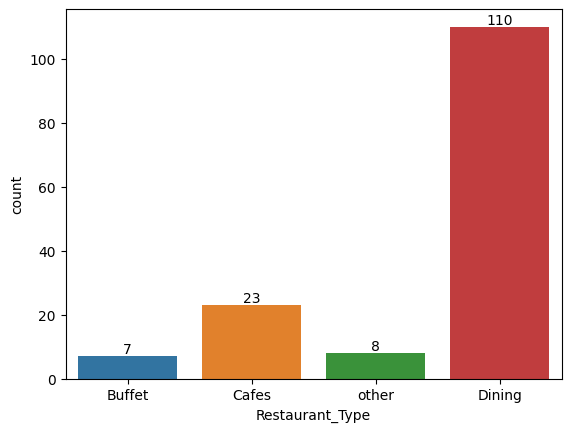

In [8]:
# What type of restaurant do the majority of the customers order from?

plt_1 = sns.countplot(x = 'Restaurant_Type', data=df_1, hue='Restaurant_Type')

for bars in plt_1.containers:
    plt_1.bar_label(bars)

Hence Majority of the customers prefer to order the food from dining type restaurant
 

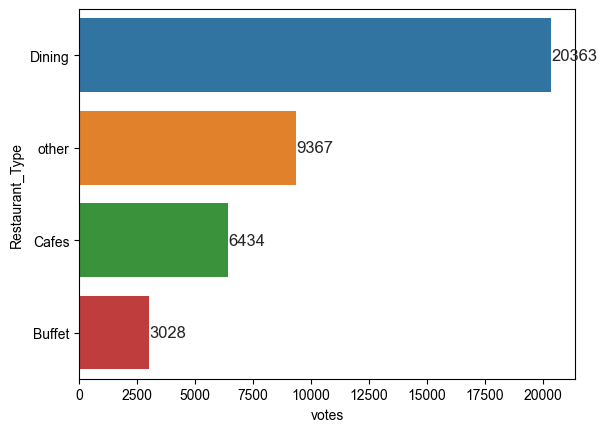

In [9]:
# How many votes has each type of restaurant received from customer

Restaurant_Votes = df_1.groupby(['Restaurant_Type'],as_index=False)['votes'].sum().sort_values(by = 'votes', ascending=False)

plt_2 = sns.barplot(x = 'votes', y = 'Restaurant_Type', data=Restaurant_Votes, hue='Restaurant_Type')

sns.set(rc={'figure.figsize':(15,5)})
for bars in plt_2.containers:
    plt_2.bar_label(bars)

Hence Dining restaurant also gets the maximum votes by the Customers as compared to other restaurant type

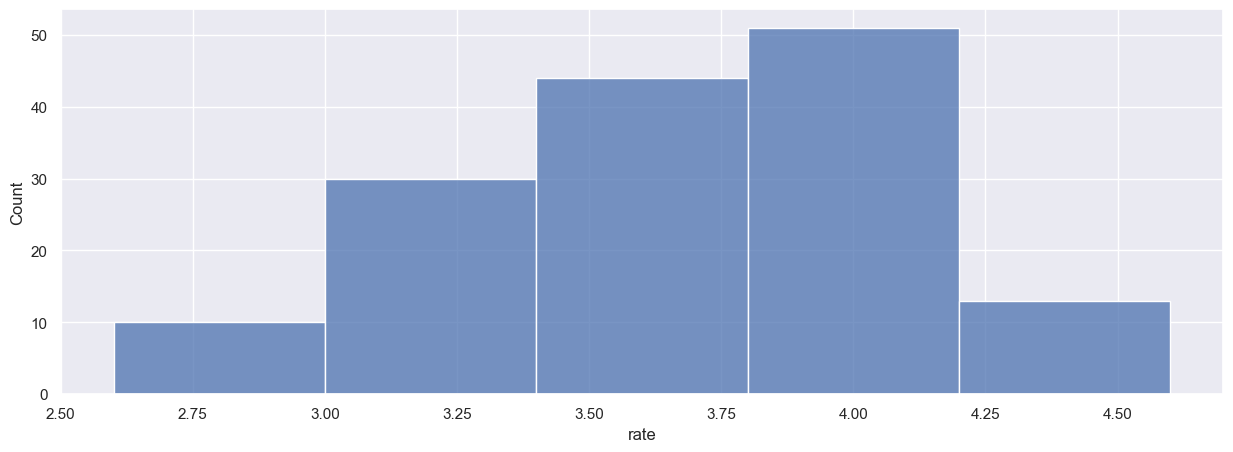

In [10]:
# What are the ratings that majority of the restaurants have received from the customers

plt_3 = sns.histplot(x = 'rate', bins=5, data=df_1)
sns.set(rc={'figure.figsize':(10,5)})

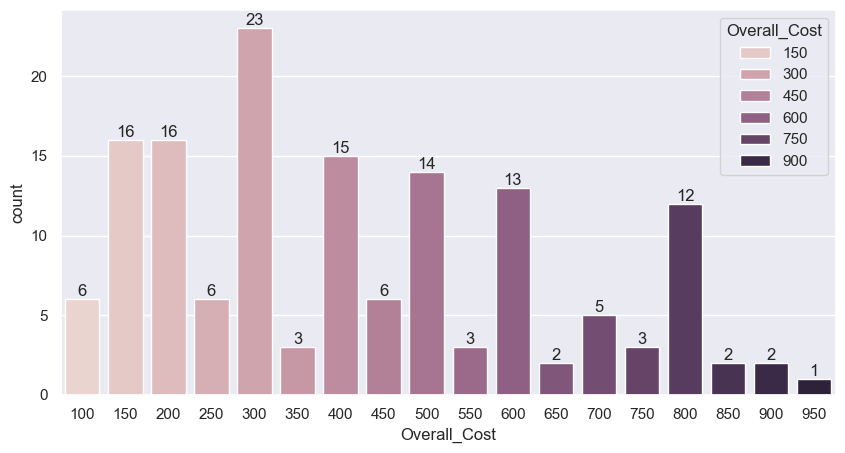

In [11]:
# What is the average spending by most couples on each order in online mode

plt_4 = sns.countplot(x = 'Overall_Cost', data=df_1, hue='Overall_Cost')

for bars in plt_4.containers:
    plt_4.bar_label(bars)

Hence the avg spending done by couples in ordering food online is Rs 300

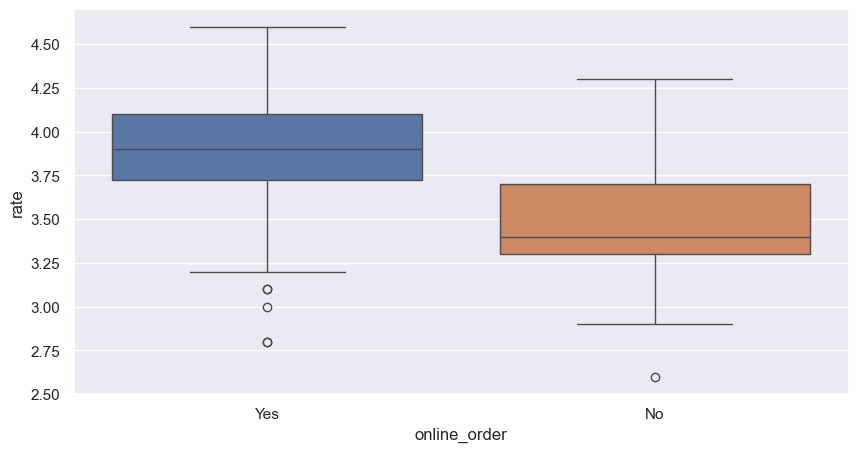

In [12]:
# Which mode (online/offline) receives the maximum rating? 

plt_5 = sns.boxplot(x = 'online_order', y = 'rate', data=df_1, hue='online_order')
sns.set(rc={'figure.figsize':(5,5)})


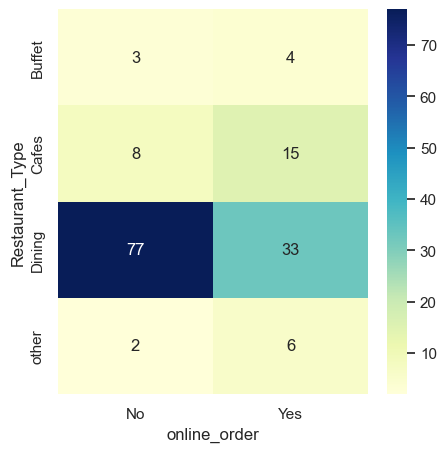

In [13]:
# What restaurant receives the max offline orders?

pivot_table = df_1.pivot_table(index='Restaurant_Type', columns= 'online_order', aggfunc= 'size', fill_value=0)
plt_6 = sns.heatmap(data=pivot_table, annot=True, cmap='YlGnBu', fmt='d')
 

Hence Dining Restaurants receives the maximum offline orders

In [14]:
#Subsetting a dataset

#df_1[['Restaurant_Type','rate','votes','Overall_Cost']].head(20)

#df_1.select_dtypes('object')

#df_1[df_1.columns[3:]]

In [18]:
# Filtering the dataset

# 1. Using loccate method

'''df_1.loc[(df_1['Restaurant_Type'] == 'Buffet')
         & (df_1['votes'] >= 200)]'''

# 2. Using query function

df_1.query('Restaurant_Type == "Dining"')

,Restaurant_Name,online_order,book_table,rate,votes,Overall_Cost,Restaurant_Type
32,Sweet Truth,Yes,No,3.9,35,500,Dining
33,Ovenstory Pizza,Yes,No,3.9,172,750,Dining
35,Behrouz Biryani,Yes,No,3.9,230,650,Dining
36,Fast And Fresh,Yes,No,2.8,91,400,Dining
37,Szechuan Dragon,Yes,No,4.2,1647,600,Dining
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [22]:
df_2 = df_1.groupby(['Restaurant_Type'],as_index=False)[['Overall_Cost','rate']].agg(['mean'])
df_2

,Restaurant_Type,Overall_Cost,rate
,,mean,mean
0,Buffet,671.428571,3.842857
1,Cafes,545.652174,3.765217
2,Dining,357.272727,3.571818
3,other,668.750000,3.912500
